# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [119]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [120]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (numpy.sin(x))*x**2

Ensure your function works with numpy arrays:

In [121]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [122]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    return (-x**2*numpy.cos(x)+2*(x*numpy.sin(x)+numpy.cos(x))-2)

Check your solution with the same numpy array:

In [123]:
assert g(0) == 0.

In [124]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [125]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax)-g(xmin)

Check your analytic function:

In [126]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [127]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels
    '''
    if  N==1:
        deltax = (xmax-xmin)/N
        m1 =  xmin + deltax/2
            
        return ((deltax/6)*(f(xmin)+f(xmax)+4*f(m1)))
    else:


        deltax = (xmax-xmin)/N
        m1 =  xmin + deltax/2

        x1 = xmin + deltax
    
        fx=0
        fm=0
    
     
        for i in range (1, N):
            fm = fm + f(m1 + deltax*int(i))
            
    
        for i in range (1, N-1):
            fx = fx+ f(x1 + deltax*i)

        return ((deltax/6)*(f(xmin)+ f(xmax) + 4*f(m1)+ 4*fm + 2*f(x1)+2*fx))
print (integrate_numeric(0, 4, 1))



1.6266126028560373


Make sure you have implemented Simpson's rule correctly:

In [128]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [129]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


Text(0.5,1,'Log-log plot for the error in the numerical integration as a function of panel width for the function x^2sinx')

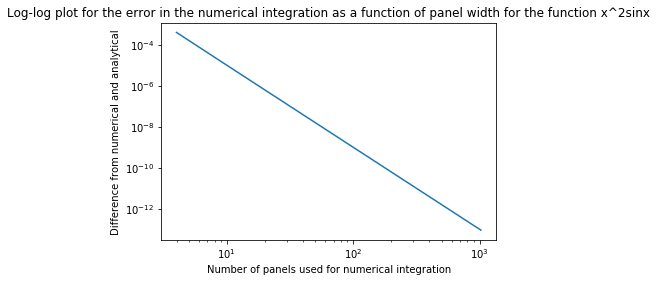

In [130]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]# Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

def integrate_numeric(xmin, xmax, npanels):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels
    '''
    output = []
    for N in npanels:
    
            deltax = (xmax-xmin)/N
            m1 =  xmin + deltax/2

            x1 = xmin + deltax

            fx=0
            fm=0


            for i in range (1, N):
                fm = fm + f(m1 + deltax*int(i))


            for i in range (1, N-1):
                fx = fx+ f(x1 + deltax*i)

            output.append((deltax/6)*(f(xmin)+ f(xmax) + 4*f(m1)+ 4*fm + 2*f(x1)+2*fx))
    return output
plt.plot(panel_counts, (-1*(numpy.array(integrate_numeric(x0, x1, panel_counts))-integrate_analytic(x0, x1))))

plt.loglog()
plt.ylabel('Difference between numerical and analytical')
plt.xlabel('Number of panels used for numerical integration')
plt.title('Log-log plot for the error in the numerical integration as a function of panel width for the function x^2sinx')



What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

Increasing the number of panels increases the accuracy of the numerical method as error in numerical integration scales with factor N^-4. If number of panels is taken too high, numerical round-off can cause higher sporadic errors, that deviate from this trend.

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Error scales as N^-2 which behaves better to much higher N. It is a lower order approximation so will not have numerical round off issues.